# Mathematical Underpinnings - Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = a^2\mathbb{E}X^2 - 2a\mathbb{E}XY + \mathbb{E}Y^2$

first element:

$\mathbb{E}X^2 = \mathbb{V}X + (\mathbb{E}X)^2 = 1$

second element:

$\mathbb{E}XY = \mathbb{E}X(X+\epsilon) = \mathbb{E}X^2 + \mathbb{E}X\epsilon = \mathbb{E}X^2 + \mathbb{E}X * \mathbb{E}\epsilon = 1 $

third element:

$\mathbb{E}Y^2 = \mathbb{V}Y + (\mathbb{E}Y)^2$

$\mathbb{E}Y = \mathbb{E}X + \mathbb{E}\epsilon = 0$

$\mathbb{E}Y^2 = \mathbb{V}Y = \mathbb{V}(X+\epsilon) = \mathbb{V}X + \mathbb{V}\epsilon + \mathbb{Cov}(X, \epsilon)$

$\mathbb{Cov}(X, \epsilon) = 0$

$\mathbb{E}Y^2 = \mathbb{V}X + \mathbb{V}\epsilon = 1 + \sigma^2$

added up:

$a^2\mathbb{E}X^2 - 2a\mathbb{E}XY + \mathbb{E}Y^2 = a^2 - 2a + 1 + \sigma^2 = (a-1)^2 + \sigma^2$

In our task we know $a^* = 1$.

---

minimum of $(a-1)^2$ is 0, the minimizing argument is $a=1$; the minimum value changes proportionally to $\sigma^2$

In [2]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [3]:
# sampling
n = 50
sigma2 = 1
x = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma2, n)
y = x + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean((a*x - y)**2)

### c)

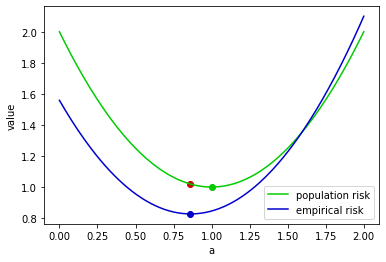

In [5]:
a_args = np.linspace(0, 2, 201)
a_pop = np.array(list(map(lambda a: population_risk(a, sigma2), a_args)))
a_emp = np.array(list(map(lambda a: empirical_risk(a, x, y), a_args)))

pop_argmin = a_args[np.argmin(a_pop)]
pop_min = population_risk(pop_argmin, sigma2)
emp_argmin = a_args[np.argmin(a_emp)]
emp_min = empirical_risk(emp_argmin, x, y)
emp_min_pop = population_risk(emp_argmin, sigma2)

plt.xlabel('a')
plt.ylabel('value')
plt.plot(a_args, a_pop, c='#00cc00')
plt.plot(a_args, a_emp, c='#0000cc')
plt.legend(['population risk', 'empirical risk'])
plt.scatter(pop_argmin, pop_min, c='#00cc00')
plt.scatter(emp_argmin, emp_min, c='#0000cc')
plt.scatter(emp_argmin, emp_min_pop, c='#cc0000') # ERM estimator
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [12]:
# excess risk
def excess_risk(A_0, n, sigma2=sigma2):
    x = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma2, n)
    y = x + eps
    a_pop = np.array(list(map(lambda a: population_risk(a, sigma2), A_0)))
    a_emp = np.array(list(map(lambda a: empirical_risk(a, x, y), A_0)))
    emp_argmin = a_args[np.argmin(a_emp)]
    emp_min_pop = population_risk(emp_argmin, sigma2)
    pop_inf = np.min(a_pop)
    return emp_min_pop - pop_inf

In [13]:
# simulations with fixed sample size
L = 200
a_args = np.linspace(-10, 10, 1001)
risks = []
for i in range(L):
    risk = excess_risk(a_args, 50)
    risks.append(risk)

In [14]:
np.mean(risks)

0.018680000000000013

In [16]:
# simulations for various sample sizes
s_args = [(n*10)**2 for n in range(1, 11)]
means = []
for s in s_args:
    risks = []
    for i in range(L):
        risk = excess_risk(a_args, s)
        risks.append(risk)
    means.append(np.mean(risks))

In [18]:
s_args

[100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]

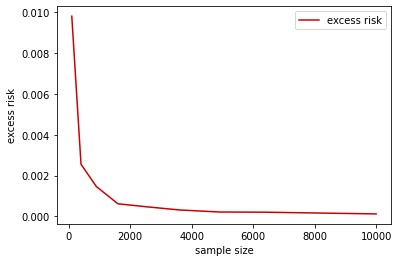

In [17]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.xlabel('sample size')
plt.ylabel('excess risk')
plt.plot(s_args, means, c='#cc0000')
plt.legend(['excess risk'])
plt.show()